In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("earthquake_structural_info.csv")

In [3]:
df.shape

(762106, 31)

In [4]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [5]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [6]:
df["damage_grade"].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='damage_grade', ylabel='count'>

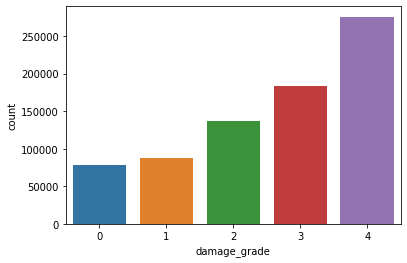

In [53]:
#plt.figure()
sns.countplot(df["damage_grade"])
#sns.countplot(df["damage_grade"], order = ["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"])

In [10]:
df.select_dtypes(include = object).dtypes

land_surface_condition         object
foundation_type                object
roof_type                      object
ground_floor_type              object
other_floor_type               object
position                       object
plan_configuration             object
condition_post_eq              object
damage_grade                   object
technical_solution_proposed    object
dtype: object

In [11]:
df["foundation_type"].value_counts()

Mud mortar-Stone/Brick    628716
Bamboo/Timber              57473
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [12]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [13]:
df.dropna(inplace = True)

In [14]:
df.shape

(762094, 31)

In [15]:
# Does the damage vary by location?

In [18]:
print(df.groupby("district_id")["damage_grade"].size())

district_id
12    39352
20    68749
21    58612
22    60639
23    88741
24    98019
28    77148
29    12644
30    89122
31    90994
36    78074
Name: damage_grade, dtype: int64


In [19]:
print(df.groupby(["district_id","ward_id"])["damage_grade"].size())

district_id  ward_id
12           120101     603
             120102     574
             120103     441
             120104     564
             120105     442
                       ... 
36           361104     925
             361105     916
             361106     937
             361107     936
             361108     921
Name: damage_grade, Length: 945, dtype: int64


In [20]:
print(df.groupby(["district_id","damage_grade"]).size())

district_id  damage_grade
12           Grade 1          7961
             Grade 2          8605
             Grade 3          9220
             Grade 4          7946
             Grade 5          5620
20           Grade 1         13087
             Grade 2         14469
             Grade 3         17085
             Grade 4         15917
             Grade 5          8191
21           Grade 1          2116
             Grade 2          7151
             Grade 3         16945
             Grade 4         20910
             Grade 5         11490
22           Grade 1          1353
             Grade 2          2993
             Grade 3          6520
             Grade 4         14409
             Grade 5         35364
23           Grade 1          1233
             Grade 2          2009
             Grade 3          3271
             Grade 4         10796
             Grade 5         71432
24           Grade 1          8330
             Grade 2         11726
             Grade 3         

In [21]:
print(df.groupby(["district_id","ward_id","damage_grade"]).size())

district_id  ward_id  damage_grade
12           120101   Grade 1          95
                      Grade 2          92
                      Grade 3         115
                      Grade 4         201
                      Grade 5         100
                                     ... 
36           361108   Grade 1          46
                      Grade 2         119
                      Grade 3         165
                      Grade 4         255
                      Grade 5         336
Length: 4640, dtype: int64


In [24]:
df1 = df.groupby(["district_id","damage_grade"]).size().reset_index(name = "count")
df1.head(10)

,district_id,damage_grade,count
0,12,Grade 1,7961
1,12,Grade 2,8605
2,12,Grade 3,9220
3,12,Grade 4,7946
4,12,Grade 5,5620
5,20,Grade 1,13087
6,20,Grade 2,14469
7,20,Grade 3,17085
8,20,Grade 4,15917
9,20,Grade 5,8191


In [25]:
df1 = df1.set_index(['district_id',"damage_grade"])
df1.head(10)

count
district_id damage_grade       
12          Grade 1        7961
            Grade 2        8605
            Grade 3        9220
            Grade 4        7946
            Grade 5        5620
20          Grade 1       13087
            Grade 2       14469
            Grade 3       17085
            Grade 4       15917
            Grade 5        8191

In [26]:
df1["percentage"] = df1["count"] / df1.groupby("district_id")["count"].sum()
df1.head(10)

count  percentage
district_id damage_grade                   
12          Grade 1        7961    0.202302
            Grade 2        8605    0.218667
            Grade 3        9220    0.234296
            Grade 4        7946    0.201921
            Grade 5        5620    0.142814
20          Grade 1       13087    0.190359
            Grade 2       14469    0.210461
            Grade 3       17085    0.248513
            Grade 4       15917    0.231523
            Grade 5        8191    0.119144

In [27]:
df_plot1 = pd.pivot_table(df1, values = "percentage", index = ["district_id"], columns = "damage_grade")
df_plot1.head(10)

damage_grade,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
district_id,,,,,
12,0.202302,0.218667,0.234296,0.201921,0.142814
20,0.190359,0.210461,0.248513,0.231523,0.119144
21,0.036102,0.122006,0.289105,0.356753,0.196035
22,0.022312,0.049358,0.107522,0.237619,0.583189
23,0.013894,0.022639,0.036860,0.121657,0.804949
24,0.084984,0.119630,0.256379,0.295596,0.243412
28,0.033896,0.035581,0.106406,0.301810,0.522308
29,0.021908,0.027127,0.061848,0.163239,0.725878
30,0.055564,0.084446,0.170755,0.292633,0.396602


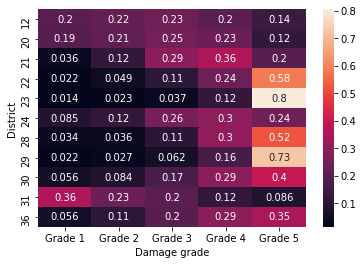

In [28]:
sns.heatmap(data = df_plot1, annot = True)
plt.xlabel("Damage grade")
plt.ylabel("District")
plt.show()

In [29]:
df["foundation_type"].value_counts()

Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

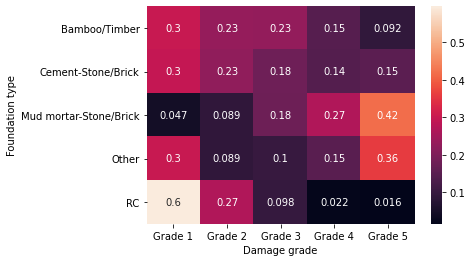

In [30]:
df2 = df.groupby(["foundation_type","damage_grade"]).size().reset_index(name = "count")
df2 = df2.set_index(['foundation_type',"damage_grade"])
df2["percentage"] = df2["count"] / df2.groupby("foundation_type")["count"].sum()

df_plot2 = pd.pivot_table(df2, values = "percentage", index = ["foundation_type"], columns = "damage_grade")

sns.heatmap(data = df_plot2, annot = True)
plt.xlabel("Damage grade")
plt.ylabel("Foundation type")
plt.show()

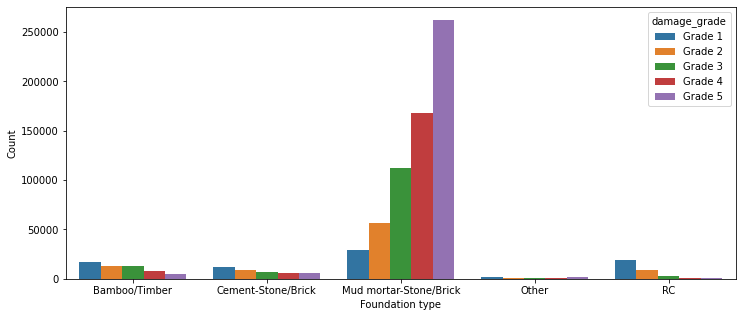

In [31]:
df3 = df.groupby(["foundation_type","damage_grade"]).size().reset_index(name = "count")

plt.figure(figsize = (12,5))
sns.barplot(data = df3, x = "foundation_type", y = "count", hue = "damage_grade")
plt.xlabel("Foundation type")
plt.ylabel("Count")
plt.show()

In [32]:
df = df.drop("building_id", axis = 1)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
district_id,762094.0,25.767912,5.807569,12.0,22.0,24.0,30.0,36.0
vdcmun_id,762094.0,2582.695976,581.174161,1201.0,2204.0,2410.0,3010.0,3611.0
ward_id,762094.0,258275.039247,58117.487798,120101.0,220402.0,241004.0,301006.0,361108.0
count_floors_pre_eq,762094.0,2.087787,0.655104,1.0,2.0,2.0,2.0,9.0
count_floors_post_eq,762094.0,1.252050,1.063278,0.0,0.0,1.0,2.0,9.0
age_building,762094.0,24.325031,65.034555,0.0,9.0,16.0,27.0,999.0
plinth_area_sq_ft,762094.0,406.673668,226.780437,70.0,280.0,358.0,470.0,5000.0
height_ft_pre_eq,762094.0,16.049424,5.493900,6.0,12.0,16.0,18.0,99.0
height_ft_post_eq,762094.0,9.868785,8.574218,0.0,0.0,11.0,16.0,99.0
has_superstructure_adobe_mud,762094.0,0.042402,0.201504,0.0,0.0,0.0,0.0,1.0


In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["damage_grade"] = encoder.fit_transform(df["damage_grade"])

In [34]:
df.head(10)

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,2,Major repair
1,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,4,Reconstruction
2,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,1,Minor repair
3,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,1,Minor repair
4,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,0,Minor repair
5,12,1207,120703,1,1,18,216,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Used in risk,1,Minor repair
6,12,1207,120703,1,0,13,234,9,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,4,Reconstruction
7,12,1207,120703,1,1,8,280,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,1,Minor repair
8,12,1207,120703,1,1,22,268,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,2,Major repair
9,12,1207,120703,1,1,10,268,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,2,Major repair


In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
district_id,762094.0,25.767912,5.807569,12.0,22.0,24.0,30.0,36.0
vdcmun_id,762094.0,2582.695976,581.174161,1201.0,2204.0,2410.0,3010.0,3611.0
ward_id,762094.0,258275.039247,58117.487798,120101.0,220402.0,241004.0,301006.0,361108.0
count_floors_pre_eq,762094.0,2.087787,0.655104,1.0,2.0,2.0,2.0,9.0
count_floors_post_eq,762094.0,1.252050,1.063278,0.0,0.0,1.0,2.0,9.0
age_building,762094.0,24.325031,65.034555,0.0,9.0,16.0,27.0,999.0
plinth_area_sq_ft,762094.0,406.673668,226.780437,70.0,280.0,358.0,470.0,5000.0
height_ft_pre_eq,762094.0,16.049424,5.493900,6.0,12.0,16.0,18.0,99.0
height_ft_post_eq,762094.0,9.868785,8.574218,0.0,0.0,11.0,16.0,99.0
has_superstructure_adobe_mud,762094.0,0.042402,0.201504,0.0,0.0,0.0,0.0,1.0


In [36]:
df.corr()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
district_id,1.000000,0.999983,0.999983,-0.108648,-0.055323,0.020155,0.038256,-0.043457,-0.031330,-0.026151,...,0.042531,0.043253,0.069725,0.103429,0.016634,-0.206669,0.035216,0.034738,0.014846,0.013374
vdcmun_id,0.999983,1.000000,1.000000,-0.108377,-0.055210,0.020314,0.037854,-0.043166,-0.031194,-0.025902,...,0.042352,0.043295,0.069827,0.102872,0.016242,-0.207028,0.035036,0.034488,0.014749,0.013674
ward_id,0.999983,1.000000,1.000000,-0.108380,-0.055207,0.020314,0.037855,-0.043169,-0.031190,-0.025900,...,0.042347,0.043295,0.069830,0.102880,0.016241,-0.207028,0.035037,0.034489,0.014750,0.013666
count_floors_pre_eq,-0.108648,-0.108377,-0.108380,1.000000,0.263945,0.047125,0.102366,0.711189,0.190654,0.035569,...,-0.035185,-0.005380,0.032694,-0.152181,-0.078350,-0.085067,0.012108,0.059964,-0.045197,0.188363
count_floors_post_eq,-0.055323,-0.055210,-0.055207,0.263945,1.000000,-0.003965,0.138072,0.261782,0.937868,0.045046,...,-0.056100,0.048212,0.070185,0.105347,0.059912,0.053771,0.121259,0.136811,0.008412,-0.611052
age_building,0.020155,0.020314,0.020314,0.047125,-0.003965,1.000000,-0.008477,0.036432,-0.007123,0.041384,...,0.016227,-0.015838,0.021048,-0.041119,-0.014493,-0.035043,-0.032327,-0.023825,-0.011564,0.053863
plinth_area_sq_ft,0.038256,0.037854,0.037855,0.102366,0.138072,-0.008477,1.000000,0.203796,0.195984,-0.003479,...,-0.002596,0.071878,0.038415,0.231981,-0.068539,-0.046654,0.207494,0.253335,-0.007112,-0.168073
height_ft_pre_eq,-0.043457,-0.043166,-0.043169,0.711189,0.261782,0.036432,0.203796,1.000000,0.375300,0.042477,...,-0.022527,0.028492,0.033439,-0.031462,-0.070366,-0.080903,0.103014,0.146838,-0.036279,0.055052
height_ft_post_eq,-0.031330,-0.031194,-0.031190,0.190654,0.937868,-0.007123,0.195984,0.375300,1.000000,0.045458,...,-0.056043,0.063843,0.066116,0.160535,0.049066,0.044468,0.167031,0.185335,0.008148,-0.635478
has_superstructure_adobe_mud,-0.026151,-0.025902,-0.025900,0.035569,0.045046,0.041384,-0.003479,0.042477,0.045458,1.000000,...,0.017584,-0.000421,0.146298,-0.045669,0.038720,-0.009665,-0.032477,-0.024236,0.043216,0.005949


<AxesSubplot:>

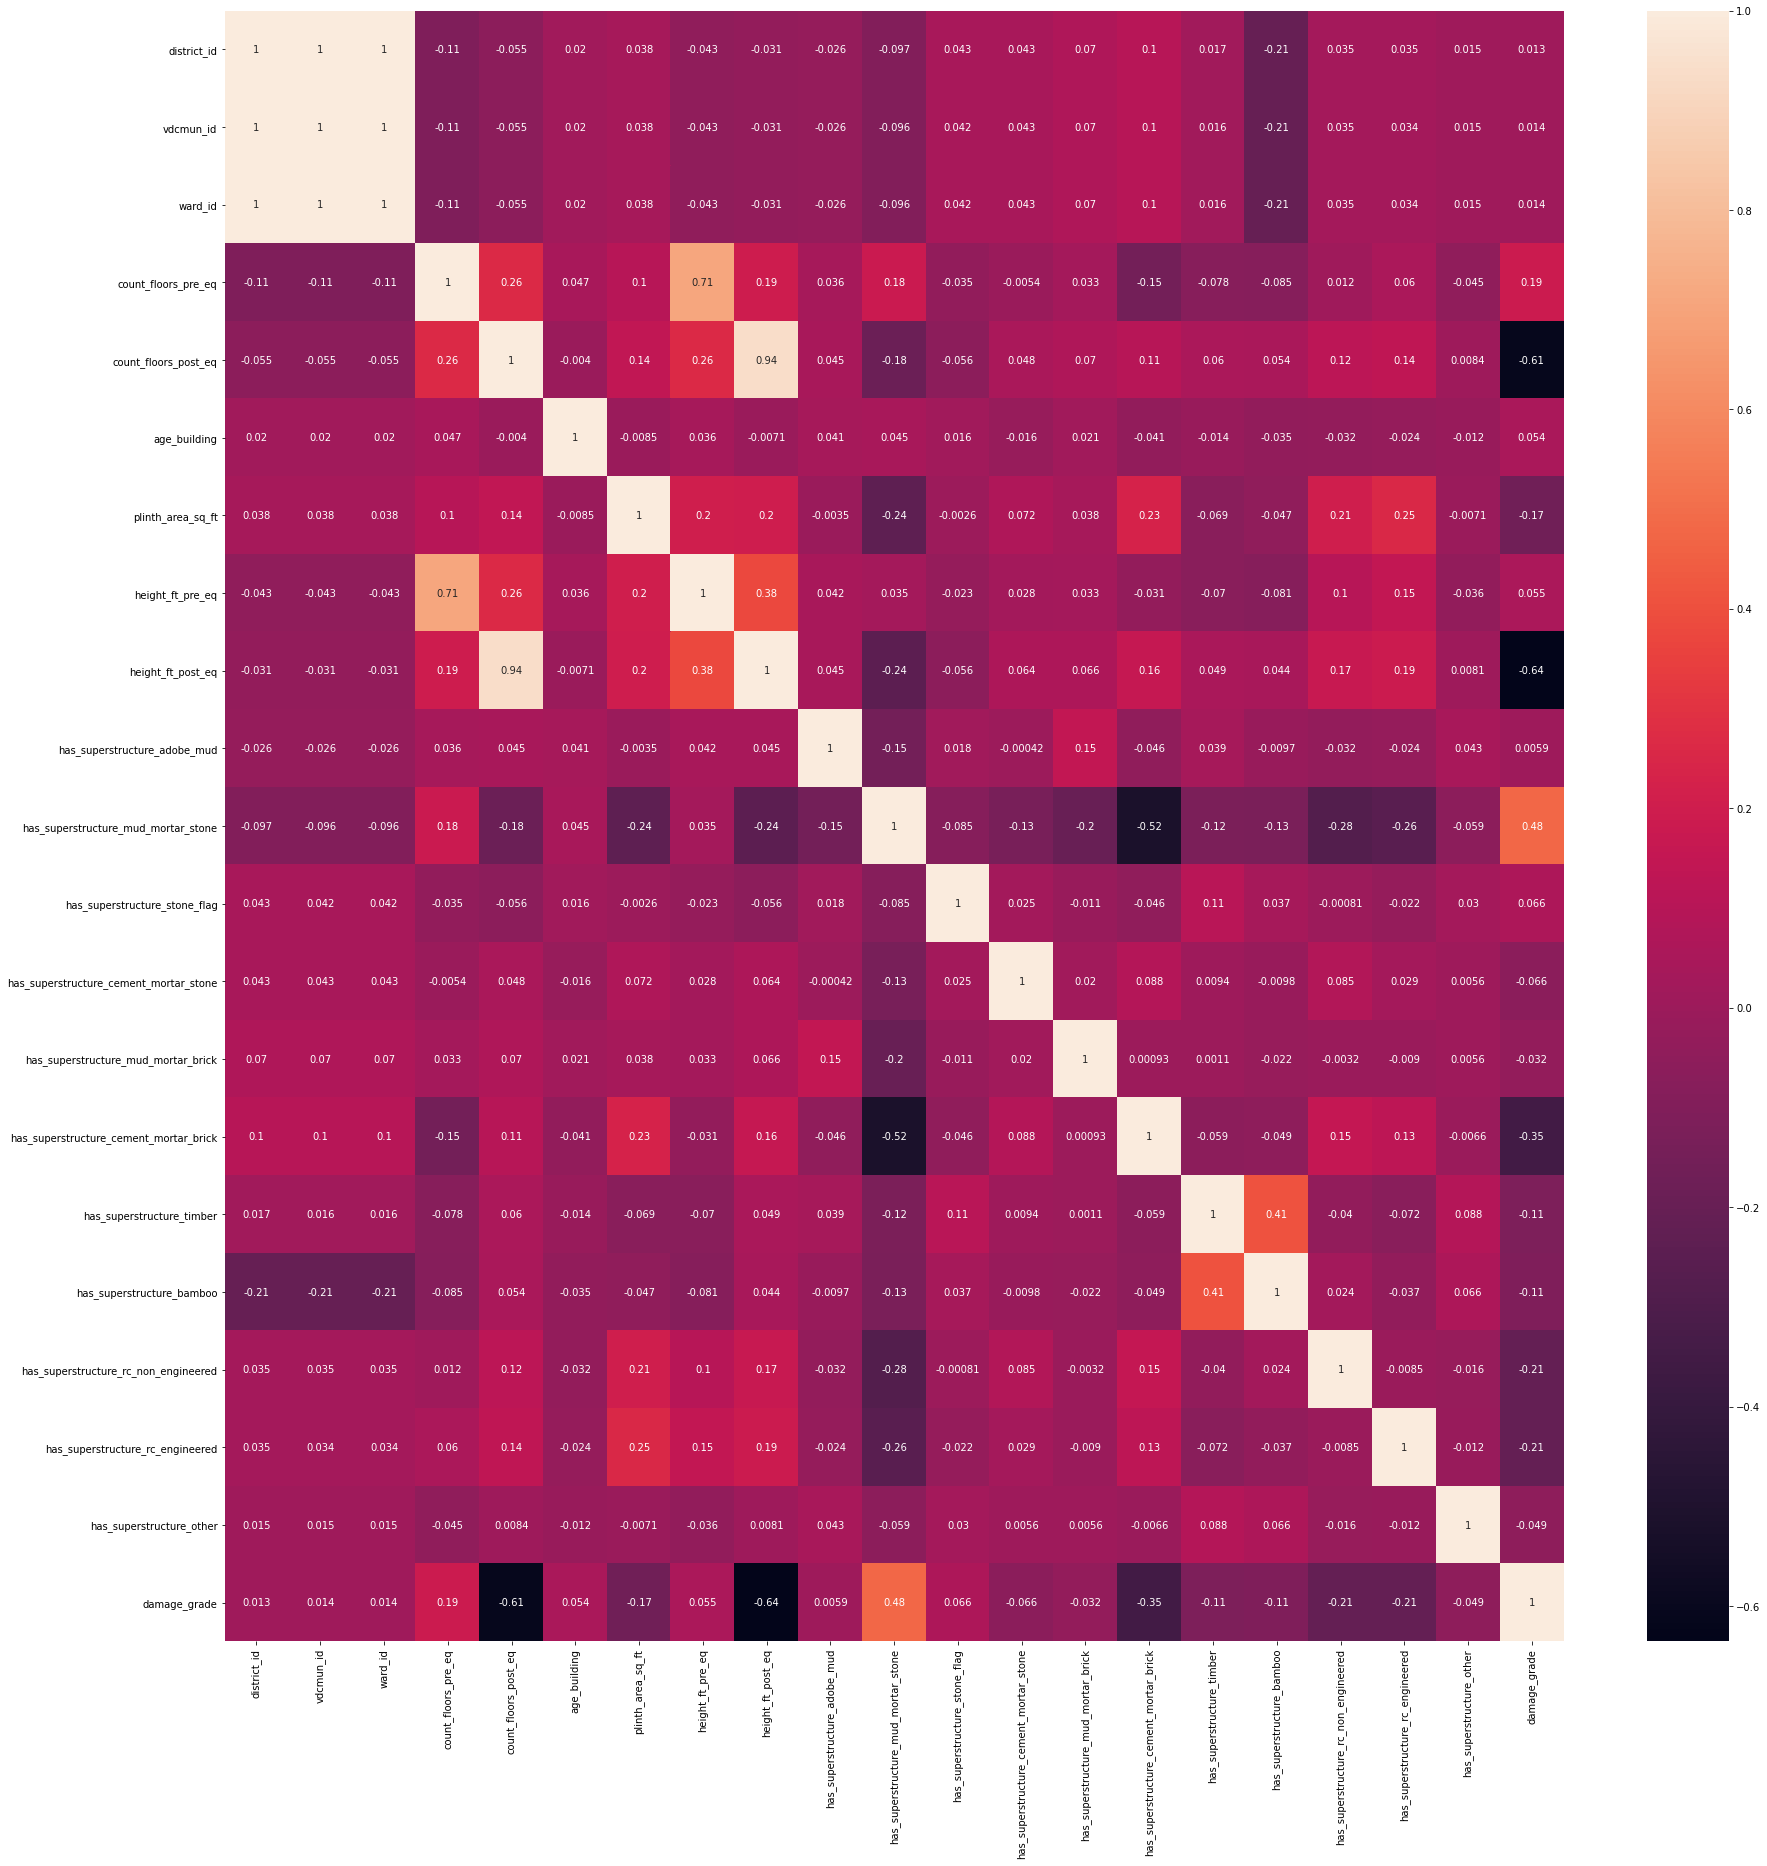

In [37]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)

In [38]:
df = df.apply(LabelEncoder().fit_transform)

In [39]:
df.corr()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
district_id,1.000000,0.993999,0.992564,-0.120918,-0.043682,0.037593,0.049385,-0.048912,-0.024838,-0.032264,...,0.077455,0.127217,-0.003679,-0.252882,0.036363,0.043442,0.007184,0.077081,-0.026940,-0.011091
vdcmun_id,0.993999,1.000000,0.999303,-0.128901,-0.028545,0.039393,0.042892,-0.051462,-0.011656,-0.027466,...,0.078519,0.120681,-0.001804,-0.246872,0.035042,0.039033,0.007685,0.071256,-0.039755,-0.022725
ward_id,0.992564,0.999303,1.000000,-0.127209,-0.029433,0.041148,0.043281,-0.047969,-0.011382,-0.025440,...,0.079957,0.118312,-0.005469,-0.247264,0.034706,0.038179,0.009031,0.069281,-0.036429,-0.020691
count_floors_pre_eq,-0.120918,-0.128901,-0.127209,1.000000,0.263945,0.147089,0.106763,0.721423,0.275852,-0.020779,...,0.032694,-0.152181,-0.078350,-0.085067,0.012108,0.059964,-0.045197,-0.122487,0.188363,0.118763
count_floors_post_eq,-0.043682,-0.028545,-0.029433,0.263945,1.000000,-0.018185,0.142680,0.267015,0.895219,0.007117,...,0.070185,0.105347,0.059912,0.053771,0.121259,0.136811,0.008412,-0.268118,-0.611052,-0.471825
age_building,0.037593,0.039393,0.041148,0.147089,-0.018185,1.000000,-0.043129,0.097449,-0.018654,-0.015195,...,0.054697,-0.140220,-0.052223,-0.076141,-0.087418,-0.080027,-0.025096,-0.094140,0.184704,0.109566
plinth_area_sq_ft,0.049385,0.042892,0.043281,0.106763,0.142680,-0.043129,1.000000,0.215555,0.223023,-0.019719,...,0.039252,0.240084,-0.070696,-0.048441,0.217428,0.258710,-0.007275,0.085275,-0.173558,-0.107404
height_ft_pre_eq,-0.048912,-0.051462,-0.047969,0.721423,0.267015,0.097449,0.215555,1.000000,0.491256,-0.004846,...,0.034163,-0.031880,-0.070854,-0.081918,0.104705,0.148992,-0.036758,-0.054690,0.055040,0.028437
height_ft_post_eq,-0.024838,-0.011656,-0.011382,0.275852,0.895219,-0.018654,0.223023,0.491256,1.000000,0.011805,...,0.064427,0.140363,0.030167,0.024689,0.177429,0.203729,-0.001296,-0.181114,-0.552569,-0.431026
land_surface_condition,-0.032264,-0.027466,-0.025440,-0.020779,0.007117,-0.015195,-0.019719,-0.004846,0.011805,1.000000,...,-0.015440,-0.044717,0.049200,0.038704,0.007506,-0.023210,0.035108,-0.016160,0.026183,-0.005664


In [40]:
x = df.drop(["damage_grade"], axis = 1)
y = df["damage_grade"]

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
model_lr = lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

from sklearn import metrics



KeyboardInterrupt: 

In [50]:

print(metrics.accuracy_score(y_test, y_pred_lr))
cm = metrics.confusion_matrix(y_test, y_pred_lr)
print(cm)

0.7578303714751847
[[17408  1464  2713  1615   512]
 [ 5695  2471 16640   825   511]
 [ 2066   963 30059  7058   887]
 [ 1801   124  4501 44082  4582]
 [   67     5    44  3294 79242]]


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
model_knn = knn.fit(x_train_scaled, y_train)
y_pred = model_knn.predict(x_test_scaled)

print(model_knn.score(x_train_scaled, y_train))

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-f4690a46945a>", line 5, in <module>
    y_pred = model_knn.predict(x_test_scaled)
  File "/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 197, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 705, in kneighbors
    chunked_results = list(pairwise_distances_chunked(
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/pairwise.py", line 1623, in pairwise_distances_chunked
    D_chunk = pairwise_distances(X_chunk, Y, metric=metric,
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/pairwise.py", line 17

TypeError: object of type 'NoneType' has no len()